## PySpark Notebook - NYC Taxi trip duration dataset 
<h2 style="color:#1E90FF;">🟢:  Task 0 Loading spark session and dataset</h2>

In [8]:
from pyspark.sql.functions import col, lit, when,date_diff,datediff, unix_timestamp, to_date, date_format
from pyspark.sql import SparkSession, functions as F

In [9]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("PySpark Practice") \
    .config("spark.local.dir", "D:/spark-temp") \
    .getOrCreate()

In [10]:
df = spark.read.csv("../data/train.csv", header=True, inferSchema=True)

In [11]:
df.show(5)

+---------+---------+-------------------+-------------------+---------------+------------------+------------------+------------------+------------------+------------------+-------------+
|       id|vendor_id|    pickup_datetime|   dropoff_datetime|passenger_count|  pickup_longitude|   pickup_latitude| dropoff_longitude|  dropoff_latitude|store_and_fwd_flag|trip_duration|
+---------+---------+-------------------+-------------------+---------------+------------------+------------------+------------------+------------------+------------------+-------------+
|id2875421|        2|2016-03-14 17:24:55|2016-03-14 17:32:30|              1| -73.9821548461914| 40.76793670654297|-73.96463012695312|40.765602111816406|                 N|          455|
|id2377394|        1|2016-06-12 00:43:35|2016-06-12 00:54:38|              1|-73.98041534423828|40.738563537597656|-73.99948120117188| 40.73115158081055|                 N|          663|
|id3858529|        2|2016-01-19 11:35:24|2016-01-19 12:10:48|    

<h2 style="color:#1E90FF;">🟢 Task 1: Count the Total Number of Records</h2>


In [12]:
df.count()

1458644

<h2 style="color:#1E90FF;">🟢 Task 2: Show the First 10 Rows Without Truncation</h2>


In [13]:
df.show(10, truncate=False)

+---------+---------+-------------------+-------------------+---------------+------------------+------------------+------------------+------------------+------------------+-------------+
|id       |vendor_id|pickup_datetime    |dropoff_datetime   |passenger_count|pickup_longitude  |pickup_latitude   |dropoff_longitude |dropoff_latitude  |store_and_fwd_flag|trip_duration|
+---------+---------+-------------------+-------------------+---------------+------------------+------------------+------------------+------------------+------------------+-------------+
|id2875421|2        |2016-03-14 17:24:55|2016-03-14 17:32:30|1              |-73.9821548461914 |40.76793670654297 |-73.96463012695312|40.765602111816406|N                 |455          |
|id2377394|1        |2016-06-12 00:43:35|2016-06-12 00:54:38|1              |-73.98041534423828|40.738563537597656|-73.99948120117188|40.73115158081055 |N                 |663          |
|id3858529|2        |2016-01-19 11:35:24|2016-01-19 12:10:48|1   

<h2 style="color:#1E90FF;">🟢 Task 3: Count Distinct Values in <code>vendor_id</code></h2>


In [14]:
df.select(col('vendor_id')).distinct().count()

2

<h2 style="color:#1E90FF;">🟢 Task 4: Find Min, Max, and Average of <code>trip_duration</code></h2>

In [15]:
df.select(F.min(col('trip_duration'))).show()

+------------------+
|min(trip_duration)|
+------------------+
|                 1|
+------------------+



In [16]:
df.select(F.max(col('trip_duration'))).show()

+------------------+
|max(trip_duration)|
+------------------+
|           3526282|
+------------------+



In [17]:
df.select(F.avg(col('trip_duration'))).show()

+------------------+
|avg(trip_duration)|
+------------------+
| 959.4922729603659|
+------------------+



<h2 style="color:#1E90FF;">🟢 Task 5: Filter Trips with <code>passenger_count</code> Greater Than 4</h2>


In [18]:
df.filter(col('passenger_count') > 4).show(5)

+---------+---------+-------------------+-------------------+---------------+------------------+-----------------+------------------+------------------+------------------+-------------+
|       id|vendor_id|    pickup_datetime|   dropoff_datetime|passenger_count|  pickup_longitude|  pickup_latitude| dropoff_longitude|  dropoff_latitude|store_and_fwd_flag|trip_duration|
+---------+---------+-------------------+-------------------+---------------+------------------+-----------------+------------------+------------------+------------------+-------------+
|id0801584|        2|2016-01-30 22:01:40|2016-01-30 22:09:03|              6|-73.98285675048828|40.74219512939453|-73.99208068847656|40.749183654785156|                 N|          443|
|id0675800|        2|2016-02-15 09:25:15|2016-02-15 09:35:49|              6|-73.97775268554688|40.75463104248047|-74.00167846679688| 40.75642013549805|                 N|          634|
|id0913838|        2|2016-02-03 16:22:50|2016-02-03 16:37:20|         

<h2 style="color:#1E90FF;">🟢 Task 6: Filter Trips with <code>trip_duration</code> &lt; 60 sec or &gt; 2 hrs</h2>


In [19]:
df.filter((col('trip_duration') < 60) | (col('trip_duration') > 60*60*2)).show(5)

+---------+---------+-------------------+-------------------+---------------+------------------+------------------+------------------+------------------+------------------+-------------+
|       id|vendor_id|    pickup_datetime|   dropoff_datetime|passenger_count|  pickup_longitude|   pickup_latitude| dropoff_longitude|  dropoff_latitude|store_and_fwd_flag|trip_duration|
+---------+---------+-------------------+-------------------+---------------+------------------+------------------+------------------+------------------+------------------+-------------+
|id1510700|        2|2016-02-20 21:58:13|2016-02-20 21:59:10|              1| -73.9583969116211| 40.77262878417969|-73.95513153076172| 40.77424240112305|                 N|           57|
|id2954399|        1|2016-06-27 11:22:37|2016-06-27 11:23:17|              1|-74.00102996826172| 40.75665283203125| -74.0009994506836| 40.75662612915039|                 N|           40|
|id3307903|        2|2016-02-20 04:03:06|2016-02-21 03:33:00|    

<h2 style="color:#1E90FF;">🟢 Task 7: Check for Nulls in Any Columns</h2>


In [20]:
for c in df.columns:
    print(f"Column: {c}, Null Count: {df.filter(col(c).isNull()).count()}")



Column: id, Null Count: 0
Column: vendor_id, Null Count: 0
Column: pickup_datetime, Null Count: 0
Column: dropoff_datetime, Null Count: 0
Column: passenger_count, Null Count: 0
Column: pickup_longitude, Null Count: 0
Column: pickup_latitude, Null Count: 0
Column: dropoff_longitude, Null Count: 0
Column: dropoff_latitude, Null Count: 0
Column: store_and_fwd_flag, Null Count: 0
Column: trip_duration, Null Count: 0


In [21]:
df.select([F.count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+---------+---------------+----------------+---------------+----------------+---------------+-----------------+----------------+------------------+-------------+
| id|vendor_id|pickup_datetime|dropoff_datetime|passenger_count|pickup_longitude|pickup_latitude|dropoff_longitude|dropoff_latitude|store_and_fwd_flag|trip_duration|
+---+---------+---------------+----------------+---------------+----------------+---------------+-----------------+----------------+------------------+-------------+
|  0|        0|              0|               0|              0|               0|              0|                0|               0|                 0|            0|
+---+---------+---------------+----------------+---------------+----------------+---------------+-----------------+----------------+------------------+-------------+



<h2 style="color:#1E90FF;">🟡 Task 8: Create a New Column for Trip Duration in Minutes</h2>


In [22]:
df = df.withColumn('trip_duration_in_minutes',F.unix_timestamp(col('dropoff_datetime'))-F.unix_timestamp(col('pickup_datetime')))
df.select(['trip_duration_in_minutes','pickup_datetime']).show(5)

+------------------------+-------------------+
|trip_duration_in_minutes|    pickup_datetime|
+------------------------+-------------------+
|                     455|2016-03-14 17:24:55|
|                     663|2016-06-12 00:43:35|
|                    2124|2016-01-19 11:35:24|
|                     429|2016-04-06 19:32:31|
|                     435|2016-03-26 13:30:55|
+------------------------+-------------------+
only showing top 5 rows



<h2 style="color:#1E90FF;">🟡 Task 9: Extract Hour of Day from <code>pickup_datetime</code></h2>


In [23]:
df =  df.withColumn('hour_of_day',F.hour(col('pickup_datetime')))
df.select(['hour_of_day','pickup_datetime']).show(5)

+-----------+-------------------+
|hour_of_day|    pickup_datetime|
+-----------+-------------------+
|         17|2016-03-14 17:24:55|
|          0|2016-06-12 00:43:35|
|         11|2016-01-19 11:35:24|
|         19|2016-04-06 19:32:31|
|         13|2016-03-26 13:30:55|
+-----------+-------------------+
only showing top 5 rows



<h2 style="color:#1E90FF;">🟡 Task 10: Average Trip Duration Grouped by Hour of Day</h2>


In [24]:
df.columns

['id',
 'vendor_id',
 'pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'trip_duration',
 'trip_duration_in_minutes',
 'hour_of_day']

In [25]:
df.groupBy('hour_of_day').agg(F.avg('trip_duration')).orderBy('hour_of_day').show(24, truncate=False)

+-----------+------------------+
|hour_of_day|avg(trip_duration)|
+-----------+------------------+
|0          |936.6573016826923 |
|1          |903.0871120790231 |
|2          |892.3596265875457 |
|3          |887.0993876589731 |
|4          |921.976443768997  |
|5          |822.2989601386482 |
|6          |797.4349434552454 |
|7          |831.758345323741  |
|8          |924.5591994392496 |
|9          |933.5289153599456 |
|10         |933.3676054831365 |
|11         |966.4302821426485 |
|12         |993.5330791813337 |
|13         |1032.2463587648483|
|14         |1075.789263985355 |
|15         |1118.8325326203505|
|16         |1080.1462845769906|
|17         |1030.581619444844 |
|18         |981.583233995585  |
|19         |894.3566793639544 |
|20         |879.4615448663051 |
|21         |890.5212211201521 |
|22         |1023.4559210853253|
|23         |925.0914093286523 |
+-----------+------------------+



<h2 style="color:#1E90FF;">🟡 Task 11: Number of Trips by Each Vendor</h2>


In [26]:
df.groupby('vendor_id').agg(F.count('vendor_id').alias('count')).show()

+---------+------+
|vendor_id| count|
+---------+------+
|        1|678342|
|        2|780302|
+---------+------+



In [27]:
df.groupBy("vendor_id").count().show()

+---------+------+
|vendor_id| count|
+---------+------+
|        1|678342|
|        2|780302|
+---------+------+



<h2 style="color:#1E90FF;">🟡 Task 12: Calculate Geodesic Distance (Haversine Formula)</h2>

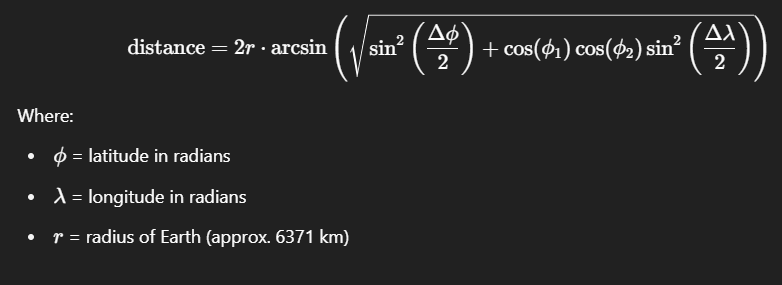


In [28]:
df = (
    df.withColumn('pickup_longitude,radian',F.radians(col('pickup_longitude')))
    .withColumn('pickup_latitude,radian',F.radians(col('pickup_latitude')))
    .withColumn('dropoff_longitude,radian',F.radians(col('dropoff_longitude')))
    .withColumn('dropoff_latitude,radian',F.radians(col('dropoff_latitude')))
)
df = (
    df.withColumn('delta_longitude',col('dropoff_longitude,radian') - col('pickup_longitude,radian'))
    .withColumn('delta_latitude',col('dropoff_latitude,radian') - col('pickup_latitude,radian'))
    .withColumn('cos_pickup_latitude',F.cos(col('pickup_latitude,radian')))
    .withColumn('cos_dropoff_latitude',F.cos(col('dropoff_latitude,radian')))
)
df = (
    df.withColumn('sin_del_lat',F.sin(col('delta_latitude')/2))
    .withColumn('sin_del_long',F.sin(col('delta_longitude')/2))
)
df = (
    df.withColumn('sin_del_lat_sq',F.pow(col('sin_del_lat'),2))
    .withColumn('sin_del_long_sq',F.pow(col('sin_del_long'),2))
)
df = (
    df.withColumn('arc_sin',F.asin(F.sqrt(col('sin_del_lat_sq') + col('cos_pickup_latitude') * col('cos_dropoff_latitude') * col('sin_del_long_sq'))))
)
df = (
    df.withColumn('distance',col('arc_sin') * 2 * 6371)
)

df = df.drop('pickup_longitude,radian','pickup_latitude,radian','dropoff_longitude,radian','dropoff_latitude,radian','delta_longitude','delta_latitude','cos_pickup_latitude','cos_dropoff_latitude','sin_del_lat','sin_del_long','sin_del_lat_sq','sin_del_long_sq','arc_sin')
 
df.show(5, truncate=False)

+---------+---------+-------------------+-------------------+---------------+------------------+------------------+------------------+------------------+------------------+-------------+------------------------+-----------+------------------+
|id       |vendor_id|pickup_datetime    |dropoff_datetime   |passenger_count|pickup_longitude  |pickup_latitude   |dropoff_longitude |dropoff_latitude  |store_and_fwd_flag|trip_duration|trip_duration_in_minutes|hour_of_day|distance          |
+---------+---------+-------------------+-------------------+---------------+------------------+------------------+------------------+------------------+------------------+-------------+------------------------+-----------+------------------+
|id2875421|2        |2016-03-14 17:24:55|2016-03-14 17:32:30|1              |-73.9821548461914 |40.76793670654297 |-73.96463012695312|40.765602111816406|N                 |455          |455                     |17         |1.4985207796469109|
|id2377394|1        |2016-06

In [29]:
df.show(5, truncate=False)

+---------+---------+-------------------+-------------------+---------------+------------------+------------------+------------------+------------------+------------------+-------------+------------------------+-----------+------------------+
|id       |vendor_id|pickup_datetime    |dropoff_datetime   |passenger_count|pickup_longitude  |pickup_latitude   |dropoff_longitude |dropoff_latitude  |store_and_fwd_flag|trip_duration|trip_duration_in_minutes|hour_of_day|distance          |
+---------+---------+-------------------+-------------------+---------------+------------------+------------------+------------------+------------------+------------------+-------------+------------------------+-----------+------------------+
|id2875421|2        |2016-03-14 17:24:55|2016-03-14 17:32:30|1              |-73.9821548461914 |40.76793670654297 |-73.96463012695312|40.765602111816406|N                 |455          |455                     |17         |1.4985207796469109|
|id2377394|1        |2016-06

<h2 style="color:#1E90FF;">🟡 Task 13: Filter Trips Outside NYC Bounding Box</h2>


In [30]:
nyc_bounds = {
    "min_lat": 40.4774, "max_lat": 40.9176,
    "min_lon": -74.2591, "max_lon": -73.7004
}

df.filter(
    (col("pickup_latitude") < nyc_bounds["min_lat"]) |
    (col("pickup_latitude") > nyc_bounds["max_lat"]) |
    (col("pickup_longitude") < nyc_bounds["min_lon"]) |
    (col("pickup_longitude") > nyc_bounds["max_lon"]) |
    (col("dropoff_latitude") < nyc_bounds["min_lat"]) |
    (col("dropoff_latitude") > nyc_bounds["max_lat"]) |
    (col("dropoff_longitude") < nyc_bounds["min_lon"]) |
    (col("dropoff_longitude") > nyc_bounds["max_lon"])
).show()


+---------+---------+-------------------+-------------------+---------------+------------------+------------------+------------------+------------------+------------------+-------------+------------------------+-----------+--------------------+
|       id|vendor_id|    pickup_datetime|   dropoff_datetime|passenger_count|  pickup_longitude|   pickup_latitude| dropoff_longitude|  dropoff_latitude|store_and_fwd_flag|trip_duration|trip_duration_in_minutes|hour_of_day|            distance|
+---------+---------+-------------------+-------------------+---------------+------------------+------------------+------------------+------------------+------------------+-------------+------------------------+-----------+--------------------+
|id2358953|        2|2016-06-27 00:31:28|2016-06-27 01:06:44|              1|-73.87081909179688|40.773738861083984|-73.85749816894531|  41.0178108215332|                 N|         2116|                    2116|          0|  27.162649786661422|
|id0015493|        1

<h2 style="color:#1E90FF;">🟡 Task 14: Group by <code>passenger_count</code> and Find Avg <code>trip_duration</code></h2>


In [31]:
df.groupBy('passenger_count').agg(F.avg('trip_duration')).orderBy('passenger_count').show(5, truncate=False)

+---------------+------------------+
|passenger_count|avg(trip_duration)|
+---------------+------------------+
|0              |1718.4333333333334|
|1              |930.3997532751514 |
|2              |1005.4583345220095|
|3              |1028.236276212101 |
|4              |1053.5297493310802|
+---------------+------------------+
only showing top 5 rows



<h2 style="color:#1E90FF;">🔴 Task 15: Top 5 Pickup Hours with Longest Average Trip Duration</h2>


In [32]:
df.groupBy(F.hour('pickup_datetime')).agg(F.avg('trip_duration').alias('td')).orderBy(F.desc('td')).show(5, truncate=False)

+---------------------+------------------+
|hour(pickup_datetime)|td                |
+---------------------+------------------+
|15                   |1118.8325326203505|
|16                   |1080.1462845769906|
|14                   |1075.789263985355 |
|13                   |1032.2463587648483|
|17                   |1030.581619444844 |
+---------------------+------------------+
only showing top 5 rows



<h2 style="color:#1E90FF;">🔴 Task 16: Create Bins for Trip Duration (0–5, 5–10, 10–20 mins)</h2>


In [33]:
df.columns

['id',
 'vendor_id',
 'pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'trip_duration',
 'trip_duration_in_minutes',
 'hour_of_day',
 'distance']

In [34]:
df = (
    df.withColumn('0-5min', when(col('trip_duration_minutes') <= 5, 1).otherwise(0))
    .withColumn('5-10min', when((col("trip_duration_minutes") > 5) & (col("trip_duration_minutes") <= 10), 1).otherwise(0))
    .withColumn('10-15min', when((col('trip_duration_minutes') > 10) & (col('trip_duration_minutes') <= 20), 1).otherwise(0))
    .withColumn('15-20min', when((col('trip_duration_minutes') > 20), 1).otherwise(0))
)
df.count()
print(df.filter(col('0-5min')==1).count())
print(df.filter(col('5-10min')==1).count())
print(df.filter(col('10-15min')==1).count())
print(df.filter(col('15-20min')==1).count())


AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `trip_duration_minutes` cannot be resolved. Did you mean one of the following? [`trip_duration_in_minutes`, `trip_duration`, `pickup_longitude`, `dropoff_longitude`, `dropoff_latitude`].;
'Project [id#56, vendor_id#57, pickup_datetime#58, dropoff_datetime#59, passenger_count#60, pickup_longitude#61, pickup_latitude#62, dropoff_longitude#63, dropoff_latitude#64, store_and_fwd_flag#65, trip_duration#66, trip_duration_in_minutes#690L, hour_of_day#716, distance#1111, CASE WHEN ('trip_duration_minutes <= 5) THEN 1 ELSE 0 END AS 0-5min#1433]
+- Project [id#56, vendor_id#57, pickup_datetime#58, dropoff_datetime#59, passenger_count#60, pickup_longitude#61, pickup_latitude#62, dropoff_longitude#63, dropoff_latitude#64, store_and_fwd_flag#65, trip_duration#66, trip_duration_in_minutes#690L, hour_of_day#716, distance#1111]
   +- Project [id#56, vendor_id#57, pickup_datetime#58, dropoff_datetime#59, passenger_count#60, pickup_longitude#61, pickup_latitude#62, dropoff_longitude#63, dropoff_latitude#64, store_and_fwd_flag#65, trip_duration#66, trip_duration_in_minutes#690L, hour_of_day#716, pickup_longitude,radian#838, pickup_latitude,radian#853, dropoff_longitude,radian#869, dropoff_latitude,radian#886, delta_longitude#904, delta_latitude#923, cos_pickup_latitude#943, cos_dropoff_latitude#964, sin_del_lat#986, sin_del_long#1009, sin_del_lat_sq#1033, ... 3 more fields]
      +- Project [id#56, vendor_id#57, pickup_datetime#58, dropoff_datetime#59, passenger_count#60, pickup_longitude#61, pickup_latitude#62, dropoff_longitude#63, dropoff_latitude#64, store_and_fwd_flag#65, trip_duration#66, trip_duration_in_minutes#690L, hour_of_day#716, pickup_longitude,radian#838, pickup_latitude,radian#853, dropoff_longitude,radian#869, dropoff_latitude,radian#886, delta_longitude#904, delta_latitude#923, cos_pickup_latitude#943, cos_dropoff_latitude#964, sin_del_lat#986, sin_del_long#1009, sin_del_lat_sq#1033, ... 2 more fields]
         +- Project [id#56, vendor_id#57, pickup_datetime#58, dropoff_datetime#59, passenger_count#60, pickup_longitude#61, pickup_latitude#62, dropoff_longitude#63, dropoff_latitude#64, store_and_fwd_flag#65, trip_duration#66, trip_duration_in_minutes#690L, hour_of_day#716, pickup_longitude,radian#838, pickup_latitude,radian#853, dropoff_longitude,radian#869, dropoff_latitude,radian#886, delta_longitude#904, delta_latitude#923, cos_pickup_latitude#943, cos_dropoff_latitude#964, sin_del_lat#986, sin_del_long#1009, sin_del_lat_sq#1033, POWER(sin_del_long#1009, cast(2 as double)) AS sin_del_long_sq#1058]
            +- Project [id#56, vendor_id#57, pickup_datetime#58, dropoff_datetime#59, passenger_count#60, pickup_longitude#61, pickup_latitude#62, dropoff_longitude#63, dropoff_latitude#64, store_and_fwd_flag#65, trip_duration#66, trip_duration_in_minutes#690L, hour_of_day#716, pickup_longitude,radian#838, pickup_latitude,radian#853, dropoff_longitude,radian#869, dropoff_latitude,radian#886, delta_longitude#904, delta_latitude#923, cos_pickup_latitude#943, cos_dropoff_latitude#964, sin_del_lat#986, sin_del_long#1009, POWER(sin_del_lat#986, cast(2 as double)) AS sin_del_lat_sq#1033]
               +- Project [id#56, vendor_id#57, pickup_datetime#58, dropoff_datetime#59, passenger_count#60, pickup_longitude#61, pickup_latitude#62, dropoff_longitude#63, dropoff_latitude#64, store_and_fwd_flag#65, trip_duration#66, trip_duration_in_minutes#690L, hour_of_day#716, pickup_longitude,radian#838, pickup_latitude,radian#853, dropoff_longitude,radian#869, dropoff_latitude,radian#886, delta_longitude#904, delta_latitude#923, cos_pickup_latitude#943, cos_dropoff_latitude#964, sin_del_lat#986, SIN((delta_longitude#904 / cast(2 as double))) AS sin_del_long#1009]
                  +- Project [id#56, vendor_id#57, pickup_datetime#58, dropoff_datetime#59, passenger_count#60, pickup_longitude#61, pickup_latitude#62, dropoff_longitude#63, dropoff_latitude#64, store_and_fwd_flag#65, trip_duration#66, trip_duration_in_minutes#690L, hour_of_day#716, pickup_longitude,radian#838, pickup_latitude,radian#853, dropoff_longitude,radian#869, dropoff_latitude,radian#886, delta_longitude#904, delta_latitude#923, cos_pickup_latitude#943, cos_dropoff_latitude#964, SIN((delta_latitude#923 / cast(2 as double))) AS sin_del_lat#986]
                     +- Project [id#56, vendor_id#57, pickup_datetime#58, dropoff_datetime#59, passenger_count#60, pickup_longitude#61, pickup_latitude#62, dropoff_longitude#63, dropoff_latitude#64, store_and_fwd_flag#65, trip_duration#66, trip_duration_in_minutes#690L, hour_of_day#716, pickup_longitude,radian#838, pickup_latitude,radian#853, dropoff_longitude,radian#869, dropoff_latitude,radian#886, delta_longitude#904, delta_latitude#923, cos_pickup_latitude#943, COS(dropoff_latitude,radian#886) AS cos_dropoff_latitude#964]
                        +- Project [id#56, vendor_id#57, pickup_datetime#58, dropoff_datetime#59, passenger_count#60, pickup_longitude#61, pickup_latitude#62, dropoff_longitude#63, dropoff_latitude#64, store_and_fwd_flag#65, trip_duration#66, trip_duration_in_minutes#690L, hour_of_day#716, pickup_longitude,radian#838, pickup_latitude,radian#853, dropoff_longitude,radian#869, dropoff_latitude,radian#886, delta_longitude#904, delta_latitude#923, COS(pickup_latitude,radian#853) AS cos_pickup_latitude#943]
                           +- Project [id#56, vendor_id#57, pickup_datetime#58, dropoff_datetime#59, passenger_count#60, pickup_longitude#61, pickup_latitude#62, dropoff_longitude#63, dropoff_latitude#64, store_and_fwd_flag#65, trip_duration#66, trip_duration_in_minutes#690L, hour_of_day#716, pickup_longitude,radian#838, pickup_latitude,radian#853, dropoff_longitude,radian#869, dropoff_latitude,radian#886, delta_longitude#904, (dropoff_latitude,radian#886 - pickup_latitude,radian#853) AS delta_latitude#923]
                              +- Project [id#56, vendor_id#57, pickup_datetime#58, dropoff_datetime#59, passenger_count#60, pickup_longitude#61, pickup_latitude#62, dropoff_longitude#63, dropoff_latitude#64, store_and_fwd_flag#65, trip_duration#66, trip_duration_in_minutes#690L, hour_of_day#716, pickup_longitude,radian#838, pickup_latitude,radian#853, dropoff_longitude,radian#869, dropoff_latitude,radian#886, (dropoff_longitude,radian#869 - pickup_longitude,radian#838) AS delta_longitude#904]
                                 +- Project [id#56, vendor_id#57, pickup_datetime#58, dropoff_datetime#59, passenger_count#60, pickup_longitude#61, pickup_latitude#62, dropoff_longitude#63, dropoff_latitude#64, store_and_fwd_flag#65, trip_duration#66, trip_duration_in_minutes#690L, hour_of_day#716, pickup_longitude,radian#838, pickup_latitude,radian#853, dropoff_longitude,radian#869, RADIANS(dropoff_latitude#64) AS dropoff_latitude,radian#886]
                                    +- Project [id#56, vendor_id#57, pickup_datetime#58, dropoff_datetime#59, passenger_count#60, pickup_longitude#61, pickup_latitude#62, dropoff_longitude#63, dropoff_latitude#64, store_and_fwd_flag#65, trip_duration#66, trip_duration_in_minutes#690L, hour_of_day#716, pickup_longitude,radian#838, pickup_latitude,radian#853, RADIANS(dropoff_longitude#63) AS dropoff_longitude,radian#869]
                                       +- Project [id#56, vendor_id#57, pickup_datetime#58, dropoff_datetime#59, passenger_count#60, pickup_longitude#61, pickup_latitude#62, dropoff_longitude#63, dropoff_latitude#64, store_and_fwd_flag#65, trip_duration#66, trip_duration_in_minutes#690L, hour_of_day#716, pickup_longitude,radian#838, RADIANS(pickup_latitude#62) AS pickup_latitude,radian#853]
                                          +- Project [id#56, vendor_id#57, pickup_datetime#58, dropoff_datetime#59, passenger_count#60, pickup_longitude#61, pickup_latitude#62, dropoff_longitude#63, dropoff_latitude#64, store_and_fwd_flag#65, trip_duration#66, trip_duration_in_minutes#690L, hour_of_day#716, RADIANS(pickup_longitude#61) AS pickup_longitude,radian#838]
                                             +- Project [id#56, vendor_id#57, pickup_datetime#58, dropoff_datetime#59, passenger_count#60, pickup_longitude#61, pickup_latitude#62, dropoff_longitude#63, dropoff_latitude#64, store_and_fwd_flag#65, trip_duration#66, trip_duration_in_minutes#690L, hour(pickup_datetime#58, Some(Europe/Berlin)) AS hour_of_day#716]
                                                +- Project [id#56, vendor_id#57, pickup_datetime#58, dropoff_datetime#59, passenger_count#60, pickup_longitude#61, pickup_latitude#62, dropoff_longitude#63, dropoff_latitude#64, store_and_fwd_flag#65, trip_duration#66, (unix_timestamp(dropoff_datetime#59, yyyy-MM-dd HH:mm:ss, Some(Europe/Berlin), false) - unix_timestamp(pickup_datetime#58, yyyy-MM-dd HH:mm:ss, Some(Europe/Berlin), false)) AS trip_duration_in_minutes#690L]
                                                   +- Relation [id#56,vendor_id#57,pickup_datetime#58,dropoff_datetime#59,passenger_count#60,pickup_longitude#61,pickup_latitude#62,dropoff_longitude#63,dropoff_latitude#64,store_and_fwd_flag#65,trip_duration#66] csv


In [ ]:
## better approach

df = df.withColumn("duration_bin",
    when(col("trip_duration_minutes") <= 5, "0-5")
    .when((col("trip_duration_minutes") > 5) & (col("trip_duration_minutes") <= 10), "5-10")
    .when((col("trip_duration_minutes") > 10) & (col("trip_duration_minutes") <= 20), "10-20")
    .otherwise("20+")
)
df.groupBy("duration_bin").count().orderBy("duration_bin").show()

+------------+------+
|duration_bin| count|
+------------+------+
|         0-5|221974|
|       10-20|510213|
|         20+|295475|
|        5-10|430982|
+------------+------+



<h2 style="color:#1E90FF;">🔴 Task 17: Calculate Trip Speed and Filter Outliers</h2>


In [ ]:
df = df.withColumn('trip_speed', col('distance') / col('trip_duration_minutes') * 60)
df.show(5, truncate=False)

+---------+---------+-------------------+-------------------+---------------+------------------+------------------+------------------+------------------+------------------+-------------+---------------------+------------------------+-----------+------------------+---+----+-----+-----+------+-------+--------+--------+------------------+------------+
|id       |vendor_id|pickup_datetime    |dropoff_datetime   |passenger_count|pickup_longitude  |pickup_latitude   |dropoff_longitude |dropoff_latitude  |store_and_fwd_flag|trip_duration|trip_duration_minutes|trip_duration_in_minutes|hour_of_day|distance          |0-5|5-10|10-15|15-20|0-5min|5-10min|10-15min|15-20min|trip_speed        |duration_bin|
+---------+---------+-------------------+-------------------+---------------+------------------+------------------+------------------+------------------+------------------+-------------+---------------------+------------------------+-----------+------------------+---+----+-----+-----+------+------

<h2 style="color:#1E90FF;">🔴 Task 18: Analyze Trips with <code>store_and_fwd_flag</code> = "Y"</h2>


In [ ]:
df.filter(col("store_and_fwd_flag") == "Y").groupBy("vendor_id").agg(
    F.count("*").alias("stored_trips"),
    F.avg("trip_duration").alias("avg_duration")
).show()

+---------+------------+-----------------+
|vendor_id|stored_trips|     avg_duration|
+---------+------------+-----------------+
|        1|        8045|1080.763331261653|
+---------+------------+-----------------+



<h2 style="color:#1E90FF;">🔴 Task 20:  Build a Simple Trip Duration Prediction Model Using PySpark ML</h2>


In [ ]:
df.columns

['id',
 'vendor_id',
 'pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'trip_duration',
 'trip_duration_minutes',
 'trip_duration_in_minutes',
 'hour_of_day',
 'distance',
 '0-5',
 '5-10',
 '10-15',
 '15-20',
 '0-5min',
 '5-10min',
 '10-15min',
 '15-20min',
 'trip_speed',
 'duration_bin']

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

# Select features and drop nulls
model_df = df.select("passenger_count", "distance", F.hour("pickup_datetime").alias('pickup_hour'), "trip_duration") \
    .dropna()

assembler = VectorAssembler(
    inputCols=["passenger_count", "distance", "pickup_hour"],
    outputCol="features"
)
model_data = assembler.transform(model_df).select("features", "trip_duration")

# Train-test split and model
train, test = model_data.randomSplit([0.8, 0.2], seed=42)
lr = LinearRegression(featuresCol="features", labelCol="trip_duration")
lr_model = lr.fit(train)

# Evaluate
predictions = lr_model.transform(test)
predictions.select("trip_duration", "prediction").show(10)

+-------------+------------------+
|trip_duration|        prediction|
+-------------+------------------+
|            3| 478.7379836259112|
|           28| 478.7379836259112|
|           45| 478.7379836259112|
|          284| 478.7379836259112|
|          957| 478.7379836259112|
|            3| 483.2277034430065|
|          577| 483.2277034430065|
|            5|487.71742326010167|
|           49| 492.2071430771969|
|           67| 492.2071430771969|
+-------------+------------------+
only showing top 10 rows



In [ ]:
model_data.show(5, truncate=False)

+-----------------------------+-------------+
|features                     |trip_duration|
+-----------------------------+-------------+
|[1.0,1.4985207796469109,17.0]|455          |
|[1.0,1.8055071687958897,0.0] |663          |
|[1.0,6.385098495252496,11.0] |2124         |
|[1.0,1.4854984227709382,19.0]|429          |
|[1.0,1.1885884593338851,13.0]|435          |
+-----------------------------+-------------+
only showing top 5 rows

